In [27]:
# !pip install python-binance
# !pip install python-dotenv

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Loading the api keys from your local .env file
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

binance_api_key = os.getenv('binanceAPIKey')
binance_secret_key = os.getenv('binanceSecretKey')

In [30]:
from binance.client import Client
client = Client(binance_api_key, 
                binance_secret_key,
                tld='us')

In [31]:
all_tickers_info = client.get_all_tickers()
all_tickers_info[:20]

[{'symbol': 'BTCUSD4', 'price': '22882.5400'},
 {'symbol': 'ETHUSD4', 'price': '1626.0300'},
 {'symbol': 'XRPUSD', 'price': '0.2970'},
 {'symbol': 'BCHUSD4', 'price': '134.2000'},
 {'symbol': 'LTCUSD4', 'price': '96.2100'},
 {'symbol': 'USDTUSD4', 'price': '1.0003'},
 {'symbol': 'BTCUSDT', 'price': '27926.00000000'},
 {'symbol': 'ETHUSDT', 'price': '1632.15000000'},
 {'symbol': 'XRPUSDT', 'price': '0.51770000'},
 {'symbol': 'BCHUSDT', 'price': '227.40000000'},
 {'symbol': 'LTCUSDT', 'price': '65.13000000'},
 {'symbol': 'BNBUSD4', 'price': '325.6257'},
 {'symbol': 'BNBUSDT', 'price': '211.20000000'},
 {'symbol': 'ETHBTC', 'price': '0.05853000'},
 {'symbol': 'XRPBTC', 'price': '0.00000864'},
 {'symbol': 'BNBBTC', 'price': '0.00760000'},
 {'symbol': 'LTCBTC', 'price': '0.00234100'},
 {'symbol': 'BCHBTC', 'price': '0.00422000'},
 {'symbol': 'ADAUSD4', 'price': '0.3920'},
 {'symbol': 'BATUSD4', 'price': '0.2843'}]

In [32]:
len(all_tickers_info)

537

In [33]:
# Not entirely sure if we should use all of these... maybe we should ignore stable coins?
tickers = [ticker["symbol"] for ticker in all_tickers_info]
tickers[:20]

['BTCUSD4',
 'ETHUSD4',
 'XRPUSD',
 'BCHUSD4',
 'LTCUSD4',
 'USDTUSD4',
 'BTCUSDT',
 'ETHUSDT',
 'XRPUSDT',
 'BCHUSDT',
 'LTCUSDT',
 'BNBUSD4',
 'BNBUSDT',
 'ETHBTC',
 'XRPBTC',
 'BNBBTC',
 'LTCBTC',
 'BCHBTC',
 'ADAUSD4',
 'BATUSD4']

In [34]:
only_usd_coins = [coin for coin in tickers if 'USD' in coin]
only_usd_coins[:20]

['BTCUSD4',
 'ETHUSD4',
 'XRPUSD',
 'BCHUSD4',
 'LTCUSD4',
 'USDTUSD4',
 'BTCUSDT',
 'ETHUSDT',
 'XRPUSDT',
 'BCHUSDT',
 'LTCUSDT',
 'BNBUSD4',
 'BNBUSDT',
 'ADAUSD4',
 'BATUSD4',
 'ETCUSD4',
 'XLMUSD4',
 'ZRXUSD4',
 'ADAUSDT',
 'BATUSDT']

In [35]:
# Looks like this is still too many, I definitely need to read more about crypto to know which ones are actually unique
len(only_usd_coins)

510

In [36]:
# Maybe 2 years or less is reasonable for crypto, since it's still a new thing and is very volatile

# Eventually want to do this for many coins, right now this just gets data for the first symbol
# We should also think about what time granularity we want to use, and also what the time range should be
# We can try 10/15/30/60 minute intervals, and we can do at least 1000 data points

# We could also think about whether we want to download this data locally or not... 
# depends on how long it takes to get all of it, and how much space it takes up

data = None
for i in range(1):
    symbol = tickers[i]
    print(symbol)
    klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1DAY, "1 Oct, 2021") # Can change the time interval and start date
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 
                                           'volume', 'close_time', 'quote_av', 'trades', 
                                           'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    print("------------------------------------------------------")

BTCUSD4
------------------------------------------------------


In [37]:
data

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,1970-01-01 00:27:13.046400,43825.0000,48483.6900,43282.5600,48151.0500,1729.09497600,1633132799999,80495261.8729,109872,903.57067100,42082044.9606,0
1,1970-01-01 00:27:13.132800,48163.5400,48356.5400,47444.1800,47668.1200,627.86080500,1633219199999,30062317.2466,61404,309.79080700,14837270.8492,0
2,1970-01-01 00:27:13.219200,47656.2100,49242.6600,47107.0300,48215.1400,707.23854800,1633305599999,34074843.2001,69284,369.16542200,17791952.2962,0
3,1970-01-01 00:27:13.305600,48228.1000,49500.0000,46920.8500,49215.4900,1082.33020700,1633391999999,52332162.5510,98813,521.67375700,25236518.3691,0
4,1970-01-01 00:27:13.392000,49224.8900,51917.0000,49054.5200,51466.0100,1145.60561400,1633478399999,57663919.4844,99126,624.52254200,31446741.5878,0
...,...,...,...,...,...,...,...,...,...,...,...,...
489,1970-01-01 00:27:55.296000,23740.9500,24250.0000,23421.5000,23484.1400,9171.10052500,1675382399999,218702054.6102,189660,4497.37116300,107258771.7475,0
490,1970-01-01 00:27:55.382400,23491.5000,23725.0000,23217.2800,23432.8500,5014.83685900,1675468799999,117772754.8256,116257,2477.30090600,58184215.4442,0
491,1970-01-01 00:27:55.468800,23436.0200,23588.1700,23254.0000,23340.0700,2931.52005300,1675555199999,68610911.3551,78200,1401.50494500,32806264.5050,0
492,1970-01-01 00:27:55.555200,23340.0500,23436.9300,22759.7800,22956.4100,4184.87707600,1675641599999,96776692.5208,104813,2054.01835000,47503106.4745,0


In [38]:
data.dtypes

timestamp      datetime64[ns]
open                   object
high                   object
low                    object
close                  object
volume                 object
close_time              int64
quote_av               object
trades                  int64
tb_base_av             object
tb_quote_av            object
ignore                 object
dtype: object

In [39]:
# Idk why there are some columns of the object type, but let's try converting them to float I guess
columns_to_convert = ['open', 'high', 'low', 'close', 'volume', 'quote_av', 'tb_base_av', 'tb_quote_av', 'ignore']
# Convert selected columns to float
data[columns_to_convert] = data[columns_to_convert].astype(float)
data

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,1970-01-01 00:27:13.046400,43825.00,48483.69,43282.56,48151.05,1729.094976,1633132799999,8.049526e+07,109872,903.570671,4.208204e+07,0.0
1,1970-01-01 00:27:13.132800,48163.54,48356.54,47444.18,47668.12,627.860805,1633219199999,3.006232e+07,61404,309.790807,1.483727e+07,0.0
2,1970-01-01 00:27:13.219200,47656.21,49242.66,47107.03,48215.14,707.238548,1633305599999,3.407484e+07,69284,369.165422,1.779195e+07,0.0
3,1970-01-01 00:27:13.305600,48228.10,49500.00,46920.85,49215.49,1082.330207,1633391999999,5.233216e+07,98813,521.673757,2.523652e+07,0.0
4,1970-01-01 00:27:13.392000,49224.89,51917.00,49054.52,51466.01,1145.605614,1633478399999,5.766392e+07,99126,624.522542,3.144674e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
489,1970-01-01 00:27:55.296000,23740.95,24250.00,23421.50,23484.14,9171.100525,1675382399999,2.187021e+08,189660,4497.371163,1.072588e+08,0.0
490,1970-01-01 00:27:55.382400,23491.50,23725.00,23217.28,23432.85,5014.836859,1675468799999,1.177728e+08,116257,2477.300906,5.818422e+07,0.0
491,1970-01-01 00:27:55.468800,23436.02,23588.17,23254.00,23340.07,2931.520053,1675555199999,6.861091e+07,78200,1401.504945,3.280626e+07,0.0
492,1970-01-01 00:27:55.555200,23340.05,23436.93,22759.78,22956.41,4184.877076,1675641599999,9.677669e+07,104813,2054.018350,4.750311e+07,0.0


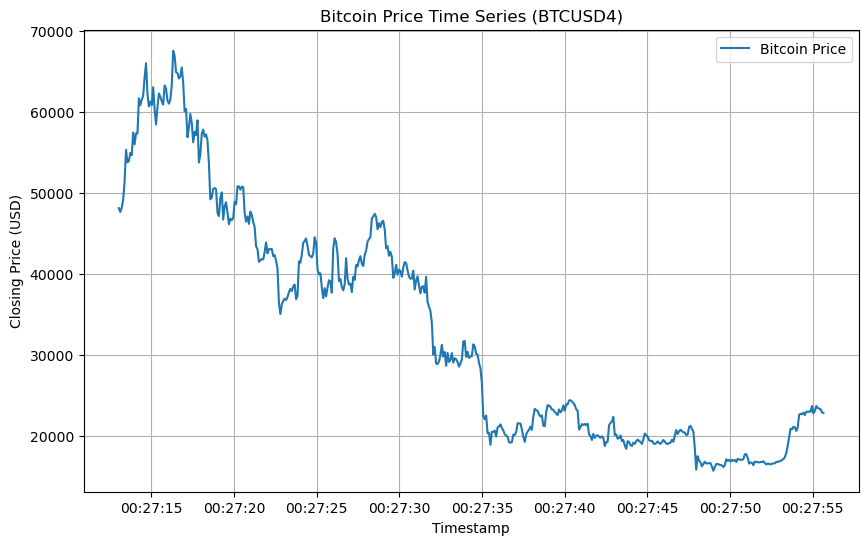

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['close'], label='Bitcoin Price')
plt.title('Bitcoin Price Time Series (BTCUSD4)')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Now I will actually run that for loop on all of them, converting the columns as we get the data
coin_data_dict = {}
for i in range(len(tickers)):
    symbol = tickers[i]
    print(symbol)
    klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1DAY, "1 Oct, 2021") # Can change the time interval and start date
    curr_data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 
                                           'volume', 'close_time', 'quote_av', 'trades', 
                                           'tb_base_av', 'tb_quote_av', 'ignore' ])
    curr_data = curr_data[['timestamp', 'close']]
    curr_data['timestamp'] = pd.to_datetime(curr_data['timestamp'])
    curr_data['close'] = curr_data['close'].astype(float)
    coin_data_dict[symbol] = curr_data
    print("------------------------------------------------------ " + str(i))

BTCUSD4
------------------------------------------------------ 0
ETHUSD4
------------------------------------------------------ 1
XRPUSD
------------------------------------------------------ 2
BCHUSD4
------------------------------------------------------ 3
LTCUSD4
------------------------------------------------------ 4
USDTUSD4
------------------------------------------------------ 5
BTCUSDT
------------------------------------------------------ 6
ETHUSDT
------------------------------------------------------ 7
XRPUSDT
------------------------------------------------------ 8
BCHUSDT
------------------------------------------------------ 9
LTCUSDT
------------------------------------------------------ 10
BNBUSD4
------------------------------------------------------ 11
BNBUSDT
------------------------------------------------------ 12
ETHBTC
------------------------------------------------------ 13
XRPBTC
------------------------------------------------------ 14
BNBBTC
---------------

In [47]:
# Turn dict into a list of pairs
coin_data_list = list(coin_data_dict.items())
coin_data_list[:3]

[('BTCUSD4',
                       timestamp     close
  0   1970-01-01 00:27:13.046400  48151.05
  1   1970-01-01 00:27:13.132800  47668.12
  2   1970-01-01 00:27:13.219200  48215.14
  3   1970-01-01 00:27:13.305600  49215.49
  4   1970-01-01 00:27:13.392000  51466.01
  ..                         ...       ...
  489 1970-01-01 00:27:55.296000  23484.14
  490 1970-01-01 00:27:55.382400  23432.85
  491 1970-01-01 00:27:55.468800  23340.07
  492 1970-01-01 00:27:55.555200  22956.41
  493 1970-01-01 00:27:55.641600  22882.54
  
  [494 rows x 2 columns]),
 ('ETHUSD4',
                       timestamp    close
  0   1970-01-01 00:27:13.046400  3310.71
  1   1970-01-01 00:27:13.132800  3388.59
  2   1970-01-01 00:27:13.219200  3420.60
  3   1970-01-01 00:27:13.305600  3387.73
  4   1970-01-01 00:27:13.392000  3516.50
  ..                         ...      ...
  489 1970-01-01 00:27:55.296000  1643.97
  490 1970-01-01 00:27:55.382400  1664.16
  491 1970-01-01 00:27:55.468800  1667.21
  492 19

In [52]:
coin_data_list[0][1]

,timestamp,close
0,1970-01-01 00:27:13.046400,48151.05
1,1970-01-01 00:27:13.132800,47668.12
2,1970-01-01 00:27:13.219200,48215.14
3,1970-01-01 00:27:13.305600,49215.49
4,1970-01-01 00:27:13.392000,51466.01
...,...,...
489,1970-01-01 00:27:55.296000,23484.14
490,1970-01-01 00:27:55.382400,23432.85
491,1970-01-01 00:27:55.468800,23340.07
492,1970-01-01 00:27:55.555200,22956.41


In [49]:
from statsmodels.tsa.stattools import coint

In [55]:
# Assuming that we have gotten data on many different coins, we can go through all the pairs 
# and run the cointegration test on them

cointegrated_pairs = []
for i in range(len(coin_data_list)):
    for j in range(i + 1, len(coin_data_list)):
        first_coin_name = coin_data_list[i][0]
        first_coin_close = coin_data_list[i][1]['close']

        second_coin_name = coin_data_list[j][0]
        second_coin_close = coin_data_list[j][1]['close']

        # Might need to do some checking of the close data, because we might not have gotten all of it for all coins properly
        if len(first_coin_close) == 0 or len(second_coin_close) == 0 or len(first_coin_close) != len(second_coin_close):
            continue

        _, pvalue, _ = coint(first_coin_close, second_coin_close)

        if pvalue < 0.05:
            print(first_coin_name + " and " + second_coin_name + ": pval = " + str(pvalue))
            cointegrated_pairs.append((first_coin_name, second_coin_name))

BTCUSD4 and ADAUSD4: pval = 0.01861812189022572
BTCUSD4 and ZRXUSD4: pval = 0.013915474821066313
BTCUSD4 and ALGOUSD4: pval = 0.03404030173565346
BTCUSD4 and ENJUSD4: pval = 0.026573693816120052
BTCUSD4 and XTZUSD4: pval = 0.0009836461692861868
BTCUSD4 and HNTUSD4: pval = 0.0001286886755951654
BTCUSD4 and MKRUSD4: pval = 0.03058610989346438
BTCUSD4 and SOLUSD4: pval = 0.046285083831076684
BTCUSD4 and EGLDUSD4: pval = 0.01835611128104336
BTCUSD4 and FILUSD4: pval = 0.041895208078167046
BTCUSD4 and AAVEUSD4: pval = 0.009012022697995122
BTCUSD4 and ANKRUSD4: pval = 0.004297361467843286
ETHUSD4 and BCHUSD4: pval = 0.03958368657839353
ETHUSD4 and ADAUSD4: pval = 0.031211764336673265
ETHUSD4 and ZRXUSD4: pval = 0.018644816010833894
ETHUSD4 and DASHUSD4: pval = 0.022840148244726147
ETHUSD4 and ZECUSD4: pval = 0.04306773493602237
ETHUSD4 and ATOMUSD4: pval = 0.03977744174658173
ETHUSD4 and ICXUSD4: pval = 0.032038124350250566
ETHUSD4 and ONTUSD4: pval = 0.03877662223973623
ETHUSD4 and HBARUSD4

In [56]:
len(cointegrated_pairs)

1508

In [57]:
from math import comb

num_pairs = comb(len(tickers), 2)
num_pairs

143916

In [58]:
# So 1508 of the 143,916 pairs passed the test...
# This might be too many, I should remove the stable coins first